<a href="https://colab.research.google.com/github/isahaasasu/MAT422/blob/main/HW3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 3.3**

## Necessary and sufficient conditions of local minimizers

In [1]:
import numpy as np

x = np.arange(-5, 5, 0.1)
def f(x):
    return x**4 - 8*x**2 + 4*x + 2

# How to find Global Minumum
from scipy import optimize
grid = (-5, 5, 0.1)
xmin_global = optimize.brute(f, (grid, ))
print("Global minima found %s" % xmin_global)

# How to find Local Minumum
# Find the 1st Derivative
import sympy as sym
x = sym.symbols('x')
first = sym.diff(x**4 - 8*x**2 + 4*x + 2, x)
print('1st derivative: ', first)

# Find the Roots of the 1st Derivative
# Type Coefficients
p = [4, 0, -16, 4]
roots = np.roots(p)
print('Roots of 1st Derivative', roots)

# Restrict the domain
xmin_local = optimize.fminbound(f, 0, 5)
print("Local minimum found %s" % xmin_local)

Global minima found [-2.11491943]
1st derivative:  4*x**3 - 16*x + 4
Roots of 1st Derivative [-2.11490754  1.86080585  0.25410169]
Local minimum found 1.8608054464313526


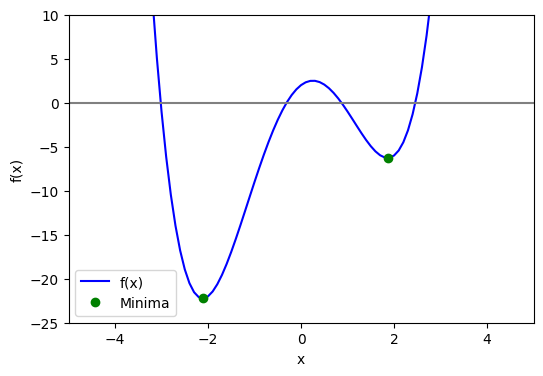

In [2]:
import numpy as np

x = np.arange(-5, 5, 0.1)
def f(x):
    return x**4 - 8*x**2 + 4*x + 2

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot the function
ax.plot(x, f(x), 'b-', label="f(x)")

# How to adjust the y-axis and x-axis
plt.ylim([-25, 10])
plt.xlim([-5, 5])

# Plot the minima
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")

# Decorate the figure
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.axhline(0, color='gray')

## Convexity and global minimizers

1st derivative:  4*x**3 - 16*x + 4
2nd derivative:  4*(3*x**2 - 4)


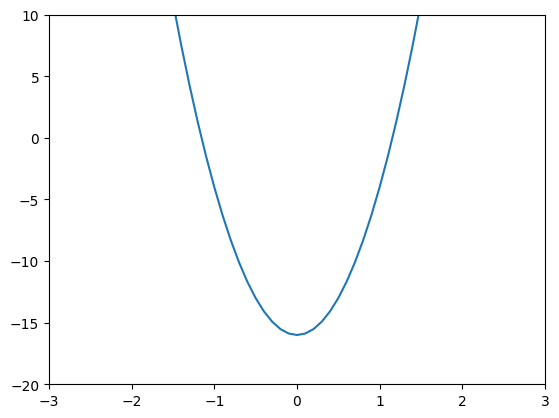

This function is not convex, because of it's negative values.


In [3]:
# How to determine Convexity
# A twice-differentiable function of is convex iff its 2nd derivative is nonnegative on its entire domain.
import numpy as np

x = np.arange(-5, 5, 0.1)
def f(x):
    return x**4 - 8*x**2 + 4*x + 2

import sympy as sym
x = sym.symbols('x')
first = sym.diff(x**4 - 8*x**2 + 4*x + 2, x)
print('1st derivative: ', first)

second = sym.diff(x**4 - 8*x**2 + 4*x + 2, x, 2)
print('2nd derivative: ', second)

# Graph the 2nd Derivative
import matplotlib.pyplot as plt
x = np.arange(-3.5, 3.5, 0.1)
y = 4*(3*x**2 - 4)

plt.ylim([-20, 10])
plt.xlim([-3, 3])

plt.plot(x,y)
plt.show()
print("This function is not convex, because of it's negative values.")

## Gradient descent

In [4]:
# How to find the Gradient Descent
def grad_1d(x):
    return x**4 - 8*x**2 + 4*x + 2

def gradient_descent_1d(grad, cur_x=-2.1, learning_rate=0.01, precision=0.01, max_iters=100):
    """
    :param grad:           The gradient of the objective function
    :param cur_x:          The current x value, which can be provided with an initial value as an argument
    :param learning_rate:  The learning rate is also equivalent to the set step size
    :param precision:      Set the convergence precision
    :param max_iters:      maximum number of iterations
    :return:               local minimum x*
    """
    for i in range(max_iters):
        grad_cur = grad(cur_x)
        if abs(grad_cur) < precision:
            break  # When the gradient approaches 0, it is regarded as convergent
        cur_x = cur_x - grad_cur * learning_rate
        print("The", i, "iteration：x value is ", cur_x)
    print(" local minimum  x =", cur_x)
    return cur_x


if __name__ == '__main__':
    gradient_descent_1d(grad_1d, cur_x=-2.1, learning_rate=0.01, precision=0.01, max_iters=100)

The 0 iteration：x value is  -1.8776810000000002
The 1 iteration：x value is  -1.6648234982963768
The 2 iteration：x value is  -1.4733193080715927
The 3 iteration：x value is  -1.3078510261573908
The 4 iteration：x value is  -1.1679562641175238
The 5 iteration：x value is  -1.0507165505657876
The 6 iteration：x value is  -0.9525557433262981
The 7 iteration：x value is  -0.8700975841121611
The 8 iteration：x value is  -0.8004596431871679
The 9 iteration：x value is  -0.7412878278383955
The 10 iteration：x value is  -0.6906952897336127
The 11 iteration：x value is  -0.6471785417597344
The 12 iteration：x value is  -0.6095384648959783
The 13 iteration：x value is  -0.5768143535505084
The 14 iteration：x value is  -0.5482315869026921
The 15 iteration：x value is  -0.5231610439458455
The 16 iteration：x value is  -0.501087907049913
The 17 iteration：x value is  -0.481587720834725
The 18 iteration：x value is  -0.4643079734667787
The 19 iteration：x value is  -0.44895385852129704
The 20 iteration：x value is  -0

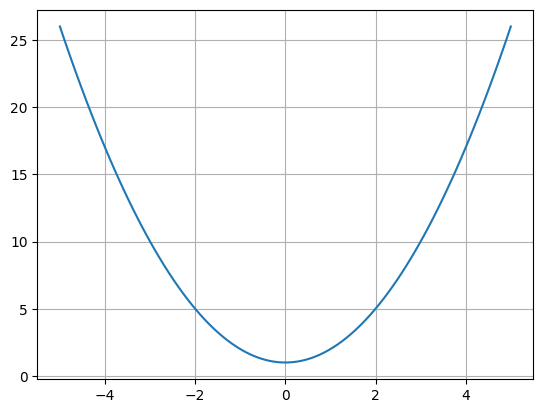

In [5]:
# Gradient descent for one-dimension

import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl
x = np.linspace(-5,5,100)
y = x ** 2 + 1
plt.grid()
plt.plot(x,y)
plt.show()